In [2]:
!pip install together -qqq

In [3]:
import os
from together import Together

In [ ]:
# Set your API key as an environment variable
os.environ["TOGETHER_API_KEY"] = "207fee5eecff4d87a306a8566da4cd025ae6b252d14302d980dab27a618033f9" 
# together API key from professor can used my own.
client = Together()

In [6]:
# Query a Large Language Model (LLM)
stream = client.chat.completions.create(
    model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
    messages=[{"role": "user", "content": "Please tell me about Miami Dade College?"}],
    stream=True,
)

# Print the streaming response
for chunk in stream:
    print(chunk.choices[0].delta.content or "", end="", flush=True)


Miami Dade College (MDC) is a public college in Miami, Florida, and one of the largest institutions of higher education in the United States. Here are some key facts about Miami Dade College:

**History:** Miami Dade College was founded in 1959 as Dade County Junior College. It was established to provide educational opportunities to the rapidly growing population of Miami-Dade County. Over the years, the college has undergone several name changes, becoming Miami-Dade Junior College in 1960 and Miami Dade College in 1970.

**Campuses:** Miami Dade College has eight campuses across Miami-Dade County, including:

1. Wolfson Campus (downtown Miami)
2. North Campus (Hialeah)
3. Kendall Campus (Kendall)
4. InterAmerican Campus (downtown Miami)
5. Hialeah Campus (Hialeah)
6. Homestead Campus (Homestead)
7. Carollton Campus (West Miami)
8. Wolfson South Campus (downtown Miami)

**Academics:** Miami Dade College offers over 300 academic programs, including associate's and bachelor's degrees, as

# Apply NLP to real use cases

In [7]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
aiohappyeyeballs          2.4.3
aiohttp                   3.11.7
aiosignal                 1.3.1
altair                    5.4.1
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blinker                   1.9.0
cachetools                5.5.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.8
decorator  

In [8]:
import warnings
warnings.filterwarnings("ignore")

## Together AI

https://www.together.ai/about
this is another platform offering you the best open source models to work with,
using the llm apis like open ai, without worrying about the underlying infrastructure.

- they add the latest realeases of LLMs in just a few days of its launch.
- you have the flexibility to choose from any models for any tasks like chat, moderation, image generation etc.
- if your work load is really high you can opt for dedicated gpu for your work load
- they also offer gpus for training of your own models from scratch or fine tuning as required

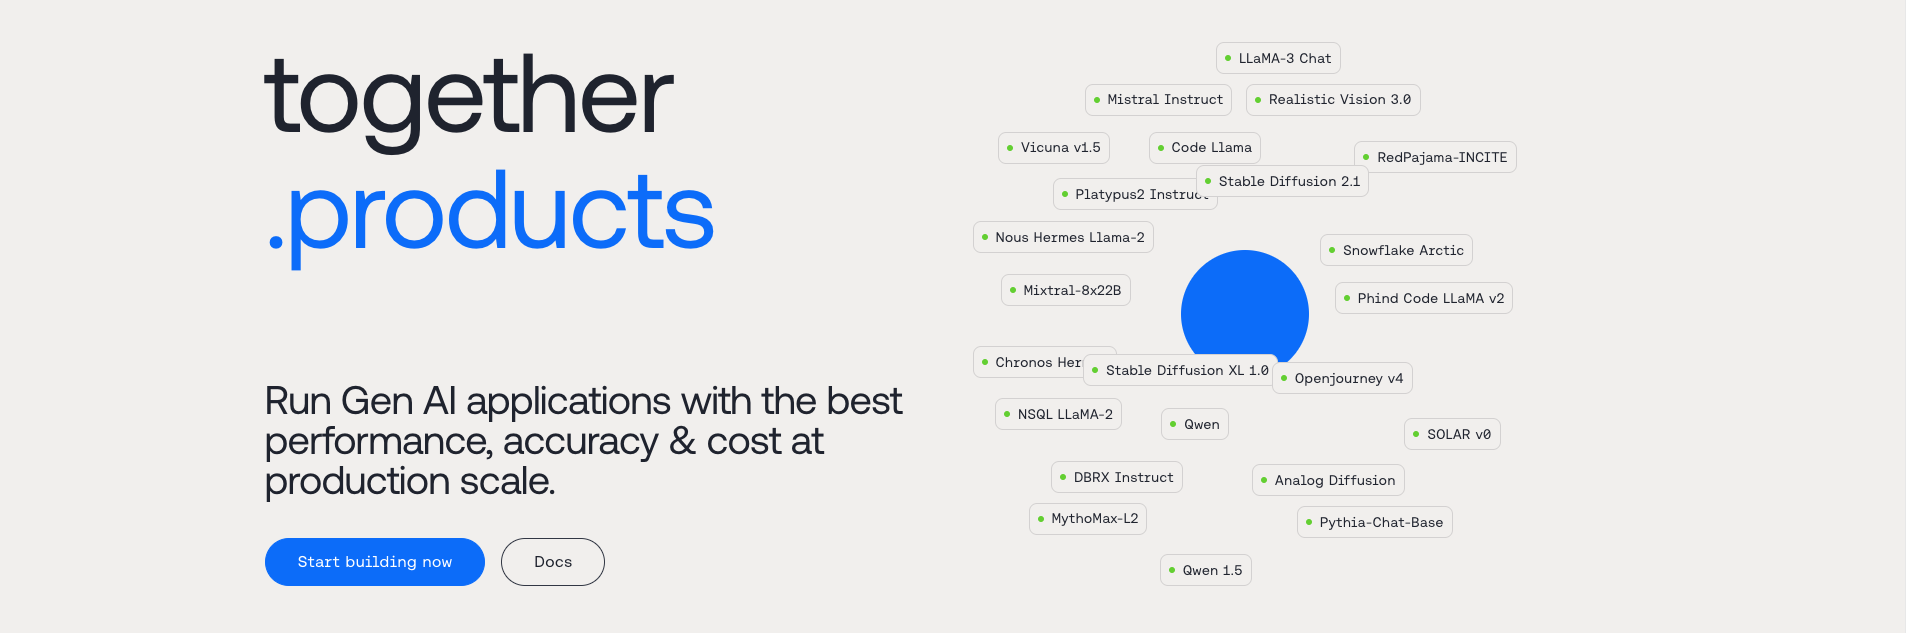

In [ ]:
!pip install langchain_together python-dotenv langchain-community langchain youtube_transcript_api pytube numpy

In [ ]:
## setting up the language model
from langchain_together import ChatTogether
# import api_key

llm = ChatTogether(api_key="207fee5eecff4d87a306a8566da4cd025ae6b252d14302d980dab27a618033f9",temperature=0.0, model="meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo")

### Introduction to Document loaders

**Document loaders provide a unified interface to load data from various sources into a standardized Document format**.

- Document loaders automatically extract and attach relevant metadata to the loaded content.

- This metadata can include source information, timestamps, or other contextual data that can be valuable for downstream processing.

- LangChain offers loaders for CSV, PDF, HTML, JSON, and even specialized loaders for sources like YouTube transcripts or GitHub repositories, as listed in their integrations page.

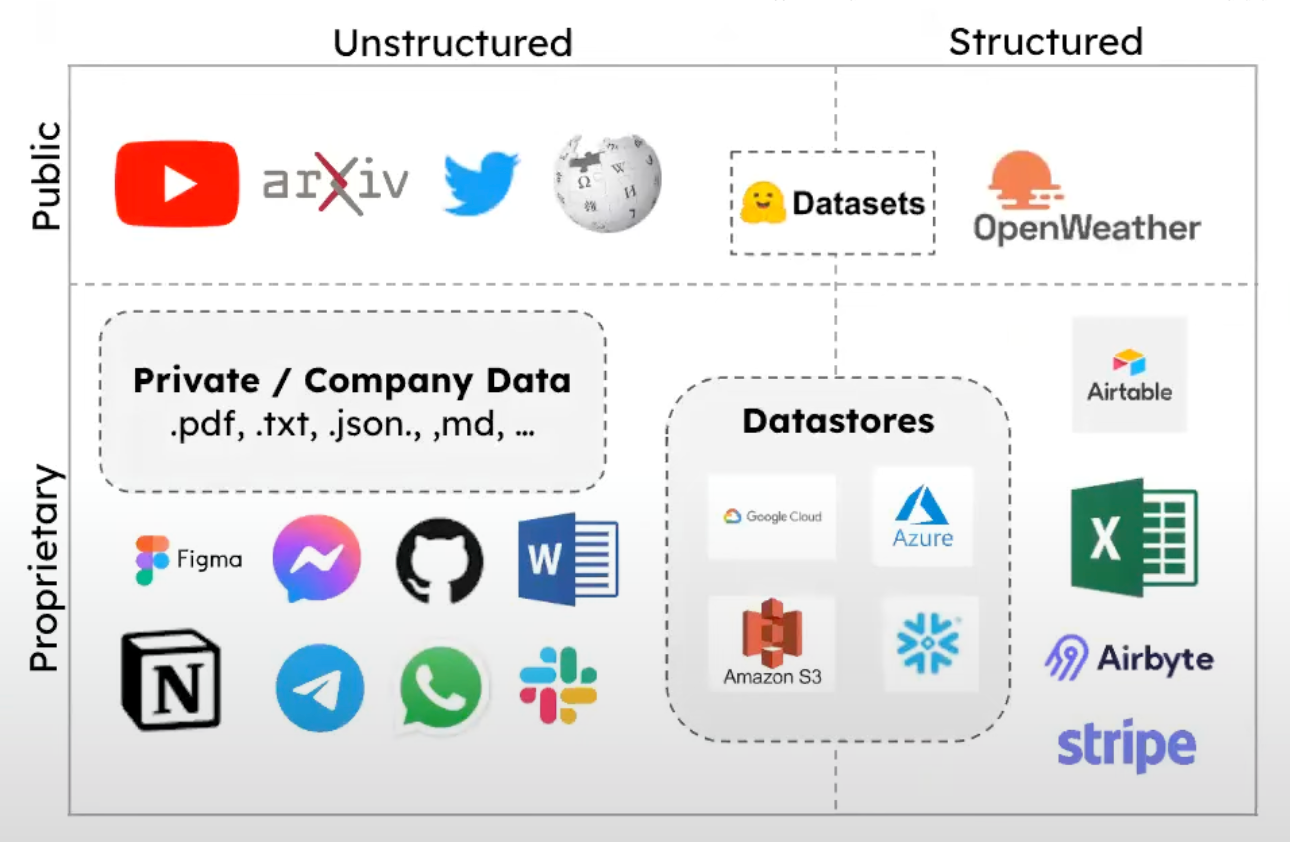

### Different document loaders

https://python.langchain.com/v0.1/docs/integrations/document_loaders/

LangChain offers a wide variety of document loaders to integrate with various file formats and data sources. These loaders are designed to parse and load documents into a standardized format for further processing.

#### Overview

- LangChain provides [over 200 document loaders](https://python.langchain.com/v0.1/docs/integrations/document_loaders/)
- These loaders support a wide range of file formats and data sources
- They are designed to work seamlessly with LangChain's document processing pipeline

#### Categories of Document Loaders

Document loaders in LangChain can be broadly categorized into two types:

1. **File Type-Based Loaders**
   - Parse and load documents based on specific file formats
   - Examples include:
     - CSV
     - PDF
     - HTML
     - Markdown

2. **Data Source-Based Loaders**
   - Retrieve data from various external sources
   - Load the data into Document objects
   - Examples include:
     - YouTube
     - Wikipedia
     - GitHub

#### Integration Capabilities

- LangChain's document loaders can integrate with almost any file format you might need
- They also support many third-party data sources

In [ ]:
## import the youtube documnent loader from LangChain
from langchain_community.document_loaders import YoutubeLoader

video_url = 'https://www.youtube.com/watch?v=q4Dmq2TKNq4'
loader = YoutubeLoader.from_youtube_url(video_url, add_video_info=False)
data = loader.load()

In [ ]:
# show the extracted page content
data[0].page_content

In [ ]:
# This code creates a list of messages for the language model:
# 1. A system message with instructions on how to summarize the video transcript
# 2. A human message containing the actual video transcript

# The messages are then passed to the language model (llm) for processing
# The model's response is stored in the 'ai_msg' variable and returned

messages = [
    (
        "system",
        """Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript. For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights, prioritize including these in your summary or key points.""",
    ),
    ("human", data[0].page_content),
]
ai_msg = llm.invoke(messages)
ai_msg

### Prompt template in LangChain

A PromptTemplate in LangChain is a powerful tool that helps in creating dynamic prompts for large language models (LLMs). It allows you to define a template with placeholders for variables that can be filled in with actual values at runtime. This helps in managing and reusing prompts efficiently, ensuring consistency and reducing the likelihood of errors in prompt creation.

A PromptTemplate consists of:

- **Template String**: The actual prompt text with placeholders for variables.
- **Input Variables**: A list of variables that will be replaced in the template string at runtime.

In [ ]:
# Set up a prompt template for summarizing a video transcript using LangChain

# Import necessary classes from LangChain
from langchain.prompts import PromptTemplate
from langchain import LLMChain

# Define a PromptTemplate for summarizing video transcripts
# The template includes instructions for the AI model on how to process the transcript
product_description_template = PromptTemplate(
    input_variables=["video_transcript"],
    template="""
    Read through the entire transcript carefully.
           Provide a concise summary of the video's main topic and purpose.
           Extract and list the five most interesting or important points from the transcript.
           For each point: State the key idea in a clear and concise manner.

        - Ensure your summary and key points capture the essence of the video without including unnecessary details.
        - Use clear, engaging language that is accessible to a general audience.
        - If the transcript includes any statistical data, expert opinions, or unique insights,
        prioritize including these in your summary or key points.

    Video transcript: {video_transcript}    """
)

In [ ]:
## invoke the chain with the video transcript
chain = LLMChain(llm=llm, prompt=product_description_template)

# Run the chain with the provided product details
summary = chain.invoke({
    "video_transcript": data[0].page_content
})

In [ ]:
from IPython.display import Markdown, display

display(Markdown(summary['text']))